In [1]:
!make

gcc -Ofast -shared -fPIC -o ./build/lib_c_functions.so src/c_functions.c


In [2]:
from lib.util import RunMode, set_run_mode, load_image, process_image, parse_weight, find_all_boxes, nms, plot_boxes
from lib.model import YOLOv2
from IPython.display import Image

import lib.util as util
import lib.mytorch.conv as conv

def run_test_stepN(stepN):
    config = {
        'run_mode': RunMode.C,
        'current_step': stepN,
        'image_path': './data/input/dog.jpg',
        'output_path': './prediction.jpg',
        'weight_path': './data/weight/yolov2-tiny-voc.weights',
        'conf_thresh': 0.5,
        'nms_thresh': 0.5,
        'class_names' : ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
                   'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
                   'dog', 'horse', 'motorbike', 'person', 'pottedplant',
                   'sheep', 'sofa', 'train', 'TVmonitor'],
        'anchors' : [[1.08, 1.19], [3.42, 4.41], [6.63, 11.38], [9.42, 5.11], [16.62, 10.52]]
        }
    
    for k, v in config.items():
        util.global_config[k] = v

    set_run_mode(config['run_mode'])

    # load weight
    yolo_weight = parse_weight(config['weight_path'])

    # preprocessing
    img = load_image(config['image_path'])
    inp = process_image(img)

    # intermediate network
    output = YOLOv2(inp, yolo_weight)

    # postprocessing
    boxes = find_all_boxes(output, config['conf_thresh'], len(config['class_names']), config['anchors'])[0]
    boxes = nms(boxes, config['nms_thresh'])
    plot_boxes(img, boxes, config['output_path'], config['class_names'])
    
    return config["output_path"]

Pad0 in RunMode.C took 38.107 ms to execute.
Conv2d0 in RunMode.C took 513.064 ms to execute.
BatchNorm2d0 in RunMode.C took 95.866 ms to execute.
MaxPool2d0 in RunMode.C took 65.503 ms to execute.
LeakyReLU0 in RunMode.C took 4.673 ms to execute.
Pad1 in RunMode.C took 64.156 ms to execute.
Conv2d1 in RunMode.C took 2528.399 ms to execute.
BatchNorm2d1 in RunMode.C took 50.182 ms to execute.
MaxPool2d1 in RunMode.C took 33.983 ms to execute.
LeakyReLU1 in RunMode.C took 2.581 ms to execute.
Pad2 in RunMode.C took 34.415 ms to execute.
Conv2d2 in RunMode.C took 1777.012 ms to execute.
BatchNorm2d2 in RunMode.C took 26.271 ms to execute.
MaxPool2d2 in RunMode.C took 17.690 ms to execute.
LeakyReLU2 in RunMode.C took 1.505 ms to execute.
Pad3 in RunMode.C took 18.942 ms to execute.
Conv2d3 in RunMode.C took 1408.837 ms to execute.
BatchNorm2d3 in RunMode.C took 13.050 ms to execute.
MaxPool2d3 in RunMode.C took 9.275 ms to execute.
LeakyReLU3 in RunMode.C took 0.753 ms to execute.
Pad4 i

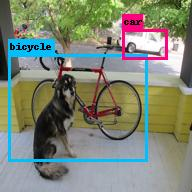

In [3]:
image_path = run_test_stepN(stepN = 2)
Image(filename=image_path)

Pad9 in RunMode.C took 38.358 ms to execute.
Conv2d9 in RunMode.C took 6376.577 ms to execute.
BatchNorm2d8 in RunMode.C took 96.060 ms to execute.
MaxPool2d6 in RunMode.C took 65.939 ms to execute.
LeakyReLU8 in RunMode.C took 5.016 ms to execute.
Pad10 in RunMode.C took 64.244 ms to execute.
Conv2d10 in RunMode.C took 14173.197 ms to execute.
BatchNorm2d9 in RunMode.C took 50.177 ms to execute.
MaxPool2d7 in RunMode.C took 33.983 ms to execute.
LeakyReLU9 in RunMode.C took 2.564 ms to execute.
Pad11 in RunMode.C took 54.819 ms to execute.
Conv2d11 in RunMode.C took 13806.959 ms to execute.
BatchNorm2d10 in RunMode.C took 26.302 ms to execute.
MaxPool2d8 in RunMode.C took 17.753 ms to execute.
LeakyReLU10 in RunMode.C took 1.091 ms to execute.
Pad12 in RunMode.C took 18.505 ms to execute.
Conv2d12 in RunMode.C took 13796.743 ms to execute.
BatchNorm2d11 in RunMode.C took 13.779 ms to execute.
MaxPool2d9 in RunMode.C took 9.314 ms to execute.
LeakyReLU11 in RunMode.C took 0.725 ms to e

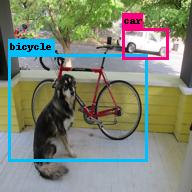

In [4]:
image_path = run_test_stepN(stepN = 3)
Image(filename=image_path)